Observable Trends

1)  I was surprised to see, especially given the sample images for the exercise, that none of the five news organisations crossed above the 0 threshold in its mean compound score.  

2)  Six of the ten most negative tweets retrieved contained the word 'murder.'  The remaining tweets of those ten contained the words 'war', 'rape', 'dead', and 'terrorist'.  The most positive tweets contain words like 'free', 'God', 'star', and 'sweet'.

3)  I investigated the large number of tweets with a polarity score of zero (155 in my data set).  At first glance, most of them do not seem to exhibit anything that makes them stand out from the other tweets that VADER was able to properly analyze, and many of them certainly contain words that would move them away from a perfect 1 score for NEUTRAL.  I have to assume VADER is not functioning properly all of the time.   

In [1]:
# DEPENDENCIES
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.axes as ax
import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# CYCLE THROUGH 100 TWEETS FROM EACH OF FIVE NEWS ORGANIZATIONS

NewsOrgs = ("BBCBreaking", 
            "CBSNews", 
            "CNN",
            "FoxNews", 
            "nytimes")

sentiment_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
text_list = []
date_list = []
counter_list = []
org_list = []

for org in NewsOrgs:
    
    counter = 0
        
    for x in range(1, 6):
        
        public_tweets = api.user_timeline(org, page=x)
        
        for tweet in public_tweets:
    
            print(str(org) + " " + str(counter))
            print(tweet['text'])
            print('------------------------------')
            
            # Analyze sentiment of tweet
            results = analyzer.polarity_scores(tweet['text'])
            compound = results['compound']
            pos = results['pos']
            neu = results['neu']
            neg = results['neg']
            text = tweet['text']
            date = tweet['created_at']
            ago = counter
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            text_list.append(text)
            date_list.append(date)
            counter_list.append(ago)
            org_list.append(org)
            
            counter = counter + 1
        
    sentiment = {"User":org,
                     "Compound":round(np.mean(compound_list),3),
                     "Positive":round(np.mean(positive_list),3),
                     "Negative":round(np.mean(negative_list),3),
                     "Neutral":round(np.mean(neutral_list),3)} 
    sentiment_list.append(sentiment)  

BBCBreaking 0
A minute's silence falls across the UK as the victims of the #LondonBridge terror attack are remembered, one year o… https://t.co/jJPzEmXsNq
------------------------------
BBCBreaking 1
Armed police cordon off Berlin Cathedral after an officer reportedly shot a man at the building https://t.co/DdbPH9rZVJ
------------------------------
BBCBreaking 2
Visa says cardholders should now be able to use their cards, with systems operating at "close to normal" levels, bl… https://t.co/tUahgaGGr0
------------------------------
BBCBreaking 3
Donald Trump's summit with Kim Jong-un on 12 June is back on, the US president says, a week after it was scrapped https://t.co/WfevC3zR8i
------------------------------
BBCBreaking 4
Visa says some card payments are currently failing across the UK and elsewhere in Europe https://t.co/3IJ9nksdEc
------------------------------
BBCBreaking 5
Five big cats which escaped from a zoo in western Germany have been recaptured, reportedly with the help of 

BBCBreaking 60
UK holds a minute's silence to remember the victims of the #ManchesterArena attack one year on… https://t.co/pV1AULBovR
------------------------------
BBCBreaking 61
Marks and Spencer to close 100 stores by 2022 saying reorganisation "vital" for firm's future https://t.co/2LBhVTOMgD
------------------------------
BBCBreaking 62
RT @BBCSport: Arsenal are set to appoint Unai Emery as their new manager.

Read more
👉 https://t.co/Z4g4asmx3i #Arsenal https://t.co/hxcv73…
------------------------------
BBCBreaking 63
Ken Livingstone says he is resigning from the Labour party amid anti-Semitism row
https://t.co/Pv17B4rd7I
------------------------------
BBCBreaking 64
Duke and Duchess of Sussex release official photographs from their wedding day

https://t.co/6yvDshkVs8… https://t.co/SEEvwJlnXr
------------------------------
BBCBreaking 65
A 72-second silence in memory of the victims marks the beginning of inquiry into Grenfell Tower fire https://t.co/yw2uIVMiyh
----------------

CBSNews 20
Watch NBA Finals 2018: Cleveland Cavaliers vs. Golden State Warriors for the fourth consecutive year… https://t.co/8rmeHJVFAv
------------------------------
CBSNews 21
Jimmy Fallon surprises Parkland students at high school graduation: "Don't let anything stop you"… https://t.co/MbLpAlhT9N
------------------------------
CBSNews 22
Woman held gun to head, fired shots near San Diego marathon, police say https://t.co/zp2Xosaaeg https://t.co/SPJ1cyimW4
------------------------------
CBSNews 23
Woman admitted to shooting and killing husband, says it was because he beat family cat, police say… https://t.co/ZZPmyGZFSB
------------------------------
CBSNews 24
Hang glider pilot dies in Idaho air show accident https://t.co/AlXgBl0PUQ https://t.co/bvrfnvMZ0V
------------------------------
CBSNews 25
Remembering 1968: The loss of RFK fifty years ago https://t.co/3cZJURGRZN https://t.co/2g5mlSi8mD
------------------------------
CBSNews 26
Woman who went into labor during final exam grad

CBSNews 80
Shooting death of Steven Pitt, forensic psychiatrist, linked to killings of two women https://t.co/SG6nPJyZby https://t.co/ZjGr7vEVpv
------------------------------
CBSNews 81
Report: In memo to Mueller, Trump's lawyers argue he could not have obstructed justice https://t.co/zQxQVTbL7x https://t.co/qdHMse4zt6
------------------------------
CBSNews 82
Four killed, seven injured in Oregon highway crash, police say https://t.co/8zsJyRpsXV https://t.co/Hd3PLRhqzo
------------------------------
CBSNews 83
Brush fire forces thousands to evacuate parts of Southern California https://t.co/71zNMZYNu9
------------------------------
CBSNews 84
Police investigate deadly hit-and-run at baseball game in Maine https://t.co/V7lc3h2iCz https://t.co/iKEqTo9HGB
------------------------------
CBSNews 85
Search continues for 2 teens believed to have drowned in Georgia https://t.co/lCRqkWmD1f https://t.co/QNgZ0GvY6z
------------------------------
CBSNews 86
Report: 14-year-old stabbed, killed aft

CNN 40
Samantha Bee will address vulgar comment about Ivanka Trump on her show https://t.co/OyIbHMShHx https://t.co/KZvpq2sW3R
------------------------------
CNN 41
FBI agent loses his gun during dance-floor backflip, accidentally shoots bar patron https://t.co/F61P7oVf0C https://t.co/kaCXlPkI9r
------------------------------
CNN 42
Southwest Airlines comes under fire after an agent asks a mom to "prove" biracial child is hers… https://t.co/BTjEHSyG5H
------------------------------
CNN 43
The US Geological Survey has warned people not to roast marshmallows over volcanic vents in Hawaii https://t.co/j8bf0QdcBk
------------------------------
CNN 44
Vermont has a new law that will pay workers $10,000 to move there and work remotely https://t.co/BOsRh6adek https://t.co/BafSsgoD5f
------------------------------
CNN 45
Parents of Parkland victims are outraged about a new video game that would let players shoot up a school… https://t.co/7cLz5FT10V
------------------------------
CNN 46
More th

FoxNews 0
.@GovMikeHuckabee: 'Please, God, Let Nancy Pelosi Continue to Be the Voice of the Democratic Party' https://t.co/1zWZ3neFVH
------------------------------
FoxNews 1
Homelessness by state. @NextRevFNC https://t.co/JkphdMznsF
------------------------------
FoxNews 2
Indiana police officers support daughter of fallen trooper at graduation more than 10 years after his death https://t.co/RLo2QV4yK3
------------------------------
FoxNews 3
.@BradSherman: "Once we get comprehensive immigration reform, then California will fully cooperate. Why are we tryi… https://t.co/UVpN6T1FvV
------------------------------
FoxNews 4
.@GovernorDavis on immigration in California: "The state has one obligation, to reduce crime. To get crime solved,… https://t.co/2hrnxWy6X4
------------------------------
FoxNews 5
.@AntonioSabatoJr: "There's a difference between legal and illegal immigration." @NextRevFNC https://t.co/97nm2kxvIo
------------------------------
FoxNews 6
.@KennedyNation on Russia probe

FoxNews 60
.@larry_kudlow: "In the world trade game, rule breaking is all over the place. That's why I think that the presiden… https://t.co/O08Fq0HcML
------------------------------
FoxNews 61
May jobs report. #FoxNewsSunday https://t.co/XIIaQOe6FA
------------------------------
FoxNews 62
.@larry_kudlow on tariffs: "The NAFTA talks haven't broken down. We're still having those conversations. And we're… https://t.co/lpIf0oleor
------------------------------
FoxNews 63
President @realDonaldTrump's tariffs. #FoxNewsSunday https://t.co/3VOpeAr4uq
------------------------------
FoxNews 64
.@larry_kudlow on tariffs: "if you don't have a level playing field, you can't operate free trade." #FoxNewsSunday… https://t.co/AKp6N4lKH0
------------------------------
FoxNews 65
.@newtgingrich: We're Closer to a 'Red Wave' Than a 'Blue Wave' in November https://t.co/LrJ2rP94jo
------------------------------
FoxNews 66
.@larry_kudlow on tariffs: "The World Trade Organization, which sets these rules, h

nytimes 20
Sutton Foster: "Some people are like, 'You sing?' I’m like, 'Yes, I sing.' It drives me crazy. It’s been fascinatin… https://t.co/LPMF0SbInb
------------------------------
nytimes 21
Democrats Hope an Asian Influx Will Help Turn Orange County Blue https://t.co/CbKFAPnsc7
------------------------------
nytimes 22
After an already rickety launch, “Solo: A Star Wars Story” took a nose-dive at the box office in its second week in… https://t.co/YB3U7nN12y
------------------------------
nytimes 23
The economy is in a sweet spot, with steady growth and broad improvement in the labor market https://t.co/lnbaMQMJn7
------------------------------
nytimes 24
RT @marclacey: As California prepares to vote Tuesday, may I introduce our stellar team of NYT national correspondents based there: @adamna…
------------------------------
nytimes 25
Here are some recommendations if you're wondering what to watch for the remainder of your weekend https://t.co/t90PQMmD9D
----------------------------

nytimes 80
The gear you’ll need to survive in the wilderness. (Or your backyard.) https://t.co/AUQEtB08Im
------------------------------
nytimes 81
Trilobites: Ladybugs, Aphids and the Toxic Combat That Might Be Happening in Your Garden https://t.co/OFiK5yf0JQ
------------------------------
nytimes 82
An R-rated movie with Melissa McCarthy and a cast of puppets can use the tagline "No Sesame. All Street." For now.  https://t.co/bVG1KqEG1y
------------------------------
nytimes 83
In this environment, free of goals, free of the promise of a new challenge, you become a true human animal https://t.co/wU2D3oLMi8
------------------------------
nytimes 84
The good, the bad and the ugly of college admissions in the U.S.: college-bound high school seniors tell all https://t.co/Jt7aEuI9Jm
------------------------------
nytimes 85
A reader who always wondered how her father survived the Holocaust found the answer in one of our obituaries. “I ha… https://t.co/jdOwtN3UPV
--------------------------

In [3]:
# CREATE DATAFRAME FROM LISTS TO EXPORT AS CSV

df_tweets = pd.DataFrame({"Account":org_list,
                          "Text":text_list,
                          "Date":date_list,
                          "Compound Score":compound_list,
                          "Positive Score":positive_list,
                          "Negative Score":negative_list,
                          "Neutral Score":neutral_list
                         })

# Convert DATE column to datetime and format
df_tweets['Date'] = pd.to_datetime(df_tweets['Date']).dt.strftime('%m/%d/%Y')

df_tweets = df_tweets[['Account',
                       'Date',
                       'Text',
                       'Compound Score',
                       'Positive Score',
                       'Negative Score',
                       'Neutral Score'
                      ]]

df_tweets.to_csv('NewsTweets.csv')

In [4]:
# CREATE DATAFRAME FOR SCATTER PLOT

df_scatter = pd.DataFrame({"Polarity":compound_list,
                   "Tweets Ago": counter_list,
                   "News Org": org_list})

# Add colors column to the DataFrame for use when plotting
def set_colors (row):
    if row['News Org'] == 'BBCBreaking':
        return 'lightblue'
    if row['News Org'] == 'CBSNews':
        return 'green'
    if row['News Org'] == 'CNN':
        return 'red'
    if row['News Org'] == 'FoxNews':
        return 'blue'
    if row['News Org'] == 'nytimes':
        return 'yellow'
df_scatter['Color'] = df_scatter.apply(set_colors, axis=1)

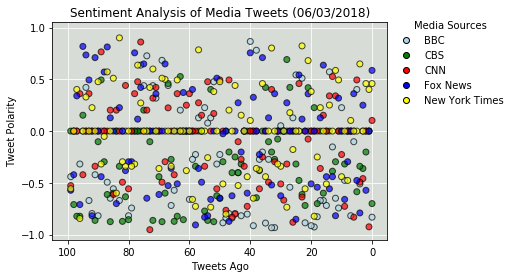

In [6]:
# CREATE SCATTER PLOT SHOWING EVERY TWEET'S POLARITY SCORE

plt.scatter(df_scatter['Tweets Ago'],
            df_scatter['Polarity'],
            alpha=0.7, 
            c = df_scatter['Color'], 
            edgecolors='black',
            zorder = 2)

plt.title('Sentiment Analysis of Media Tweets (' + str(datetime.datetime.now().strftime('%m/%d/%Y')) + ')')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')

plt.grid(color='white',zorder=1,axis='both')
ax = plt.gca()
ax.set_facecolor('xkcd:light grey')

major_y_ticks = np.arange(-1,1.1,0.5)
ax.set_yticks(major_y_ticks, minor=False)
plt.xlim(105,-5)
plt.ylim(-1.05,1.05)

line1 = lines.Line2D(range(1),range(1),linewidth=0,marker='o',markerfacecolor='lightblue',markeredgecolor='black',label='BBC')
line2 = lines.Line2D(range(1),range(1),linewidth=0,marker='o',markerfacecolor='green',markeredgecolor='black',label='CBS')
line3 = lines.Line2D(range(1),range(1),linewidth=0,marker='o',markerfacecolor='red',markeredgecolor='black',label='CNN')
line4 = lines.Line2D(range(1),range(1),linewidth=0,marker='o',markerfacecolor='blue',markeredgecolor='black',label='Fox News')
line5 = lines.Line2D(range(1),range(1),linewidth=0,marker='o',markerfacecolor='yellow',markeredgecolor='black',label='New York Times')
plt.legend(handles=[line1,line2,line3,line4,line5], 
           title='Media Sources', 
           frameon=False,
           bbox_to_anchor=(1, 1.05))

plt.savefig("Plot_Scatter.png",bbox_inches='tight',pad_inches=0.3)

plt.show()

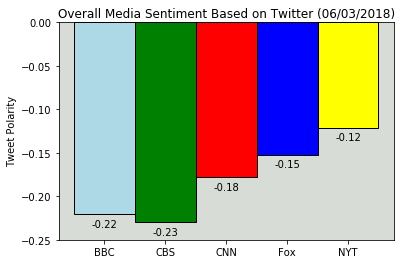

In [7]:
# CREATE BAR CHART

df_bar = pd.DataFrame(sentiment_list)

plt.bar(['BBC','CBS','CNN','Fox','NYT'],
        df_bar['Compound'],
        color=['lightblue','green','red','blue','yellow'],
        width=1,
        edgecolor='black'
       )
plt.ylim(-.25,0)
plt.title('Overall Media Sentiment Based on Twitter (' + str(datetime.datetime.now().strftime('%m/%d/%Y')) + ')')
plt.ylabel('Tweet Polarity')
ax = plt.gca()
ax.set_facecolor('xkcd:light grey')

# For each bar: Place a label 
# THANKS TO justfortherec AT https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart/28931750
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label
    space = 5
    
    # Vertical alignment for positive values
    va = 'bottom'
    # If value of bar is negative: Place label below bar
    if y_value < 0:
        space *= -1
        va = 'top'

    # Use Y value as label and format number with two decimal places
    label = "{:.2f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)                     

plt.savefig("Plot_Bar.png",bbox_inches='tight',pad_inches=0.25)
    
plt.show()